In [1]:
from ema import ema_model
import pandas as pd

# Colecting data

In [2]:
stock_list = ['AMD', 'TSLA', 'AAPL', 'F', 'AAL', 'NVDA', 'PFE', 'INTC', 'KEY',
       'BAC', 'CCL', 'AMZN', 'T', 'KMI', 'PYPL', 'BA', 'UBER', 'MSFT',
       'XOM', 'HBAN', 'GOOG', 'BMY', 'META', 'TFC', 'WFC', 'GM', 'CSX',
       'CVS', 'VZ', 'PCG', 'MMM']

In [3]:
test_list = []
errors = []
stop_loss_list = [3,7,14,21,30]

for stock in stock_list:
    for stop_loss in stop_loss_list:

        try:
            test = ema_model(stock, stop_loss,short_term=10, long_term=100)

            results = {'Stock' : stock, 'Stop loss' : stop_loss, 'Buy n hold' : test[0], 'Long position return' : test[1], 
                       'Short position return' : test[2], 'Average return' : test[3]}

            test_list.append(results)

        except:
            errors.append({stock:stop_loss})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# Making main_df and error_df 

In [4]:
test_df = pd.DataFrame(test_list)

In [5]:
test_df.sample(5)

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return
30,PFE,3,65.938848,20.054778,-6.012827,7.020976
146,PCG,7,1.576828,-9.371315,25.458093,8.043389
69,KMI,30,2.726562,24.491302,42.159171,33.325237
106,BMY,7,258.532866,-14.746631,59.637218,22.445293
133,CSX,21,2756.421791,-2.370050,-32.360239,-17.365144


In [6]:
errors_keys = []
errors_values = []

for error in errors:
    errors_keys.append(list(error.keys())[0])
    errors_values.append(list(error.values())[0])

In [7]:
error_df = pd.DataFrame()
error_df['Stocks'] = errors_keys
error_df['Stop loss'] = errors_values

error_df.head()

,Stocks,Stop loss


# Analysis

In [8]:
per_error = len(error_df) / (len(error_df) + len(test_df))

print(f'Error fee: {round(per_error*100,2)}%')

Error fee: 0.0%


In [9]:
test_df.head()

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return
0,AMD,3,1032.005252,-34.219007,-1.808842,-18.013925
1,AMD,7,1032.005252,-5.605543,-69.195185,-37.400364
2,AMD,14,1032.005252,55.339572,-29.149510,13.095031
3,AMD,21,1032.005252,117.272413,6.216292,61.744353
4,AMD,30,1032.005252,85.815498,35.487662,60.651580


In [10]:
# Long position vs Buy and hold
test_df['LP vs BH (%)'] = ((test_df['Long position return'] / test_df['Buy n hold']) - 1) * 100

# Short position vs Buy and hold
test_df['SP vs BH (%)'] = ((test_df['Short position return'] / test_df['Buy n hold']) - 1) * 100

# Average return vs Buy and hold
test_df['Avg vs BH (%)'] = ((test_df['Average return'] / test_df['Buy n hold']) - 1) * 100

In [11]:
round(test_df.sample(10),2)

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return,LP vs BH (%),SP vs BH (%),Avg vs BH (%)
141,VZ,7,240.52,-4.34,-30.23,-17.28,-101.80,-112.57,-107.19
154,MMM,30,114.55,13.79,36.02,24.90,-87.96,-68.56,-78.26
62,T,14,294.16,-4.74,22.48,8.87,-101.61,-92.36,-96.99
6,TSLA,7,11758.10,7.24,-23.68,-8.22,-99.94,-100.20,-100.07
124,WFC,30,196.71,89.17,-26.63,31.27,-54.67,-113.54,-84.10
86,MSFT,7,2299.95,3.52,-19.31,-7.90,-99.85,-100.84,-100.34
43,KEY,21,-13.78,-51.78,33.00,-9.39,275.89,-339.56,-31.84
130,CSX,3,2756.42,0.59,12.64,6.62,-99.98,-99.54,-99.76
111,META,7,932.64,28.80,-2.83,12.99,-96.91,-100.30,-98.61
47,BAC,14,30.38,-53.09,-29.94,-41.52,-274.76,-198.57,-236.66


In [12]:
return_df = test_df.groupby('Stop loss')[['Buy n hold', 'Long position return', 'Short position return', 'Average return']].mean()
round(return_df, 2)

,Buy n hold,Long position return,Short position return,Average return
Stop loss,,,,
3,4033.95,-1.26,0.43,-0.42
7,4033.95,5.10,9.73,7.41
14,4033.95,17.01,0.33,8.67
21,4033.95,24.41,3.46,13.93
30,4033.95,25.56,4.08,14.82


In [13]:
compare_df = test_df.groupby('Stop loss')[['LP vs BH (%)', 'SP vs BH (%)', 'Avg vs BH (%)']].mean()
compare_df

,LP vs BH (%),SP vs BH (%),Avg vs BH (%)
Stop loss,,,
3,-126.722859,41.468011,-42.627424
7,-68.744665,-104.752750,-86.748707
14,-24.785776,-28.749850,-26.767813
21,-116.561000,-121.201462,-118.881231
30,-82.824903,-88.628596,-85.726749


<Axes: xlabel='Stop loss'>

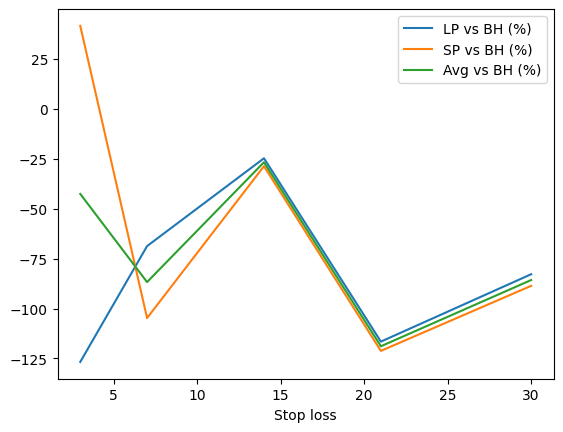

In [14]:
compare_df[['LP vs BH (%)', 'SP vs BH (%)', 'Avg vs BH (%)']].plot()

In [15]:
test_df.to_excel('../../return_data/moving_average.xlsx')